<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Big_Mart_Sales_regression/blob/main/Big_Mart_Sale_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bigmart sale prediction :

#Get data from kaggle:

In [ ]:
#Dataset: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

In [ ]:
!pip install -q kaggle

In [ ]:
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
 ! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip /content/bigmart-sales-data.zip -d /content/drive/MyDrive/MachineLearing/vidhya/Big_Mart_Sale

unzip:  cannot find or open /content/bigmart-sales-data.zip, /content/bigmart-sales-data.zip.zip or /content/bigmart-sales-data.zip.ZIP.


#Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading the datasets

In [3]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearing/vidhya/Big_Mart_Sale/Train.csv')

In [4]:
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#dealing with null values

#Cleaning the datas

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
#Preproccessing :

In [12]:

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
for i in df.columns[1:]:
  if (df[i].dtype)=='object':
    
    print(i,set(df[i]))

Item_Fat_Content {'Low Fat', 'Regular', 'reg', 'low fat', 'LF'}
Item_Type {'Starchy Foods', 'Snack Foods', 'Seafood', 'Household', 'Breads', 'Health and Hygiene', 'Soft Drinks', 'Breakfast', 'Fruits and Vegetables', 'Frozen Foods', 'Hard Drinks', 'Baking Goods', 'Meat', 'Canned', 'Dairy', 'Others'}
Outlet_Identifier {'OUT017', 'OUT010', 'OUT019', 'OUT046', 'OUT013', 'OUT045', 'OUT035', 'OUT049', 'OUT027', 'OUT018'}
Outlet_Size {'Medium', 'Small', 'High'}
Outlet_Location_Type {'Tier 3', 'Tier 2', 'Tier 1'}
Outlet_Type {'Supermarket Type3', 'Grocery Store', 'Supermarket Type2', 'Supermarket Type1'}


In [14]:
df.shape

(8523, 12)

In [15]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
obj_col=list()
for i in df.columns[1:]:
  if (df[i].dtype)=='object':
    
    obj_col.append(i)
obj_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
df=pd.get_dummies(df,columns=obj_col)

In [18]:
df.shape

(8523, 47)

In [19]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [20]:
for i in df.columns[1:]:
  
    
  print('len of set of {}='.format(i),len(set(df[i])))

len of set of Item_Weight= 416
len of set of Item_Visibility= 7880
len of set of Item_MRP= 5938
len of set of Outlet_Establishment_Year= 9
len of set of Item_Outlet_Sales= 3493
len of set of Item_Fat_Content_LF= 2
len of set of Item_Fat_Content_Low Fat= 2
len of set of Item_Fat_Content_Regular= 2
len of set of Item_Fat_Content_low fat= 2
len of set of Item_Fat_Content_reg= 2
len of set of Item_Type_Baking Goods= 2
len of set of Item_Type_Breads= 2
len of set of Item_Type_Breakfast= 2
len of set of Item_Type_Canned= 2
len of set of Item_Type_Dairy= 2
len of set of Item_Type_Frozen Foods= 2
len of set of Item_Type_Fruits and Vegetables= 2
len of set of Item_Type_Hard Drinks= 2
len of set of Item_Type_Health and Hygiene= 2
len of set of Item_Type_Household= 2
len of set of Item_Type_Meat= 2
len of set of Item_Type_Others= 2
len of set of Item_Type_Seafood= 2
len of set of Item_Type_Snack Foods= 2
len of set of Item_Type_Soft Drinks= 2
len of set of Item_Type_Starchy Foods= 2
len of set of

In [21]:
ii=0
for i in df.columns[1:]:
  if (df[i].isnull().sum())!=0:
    
    print(i)
  ii+=1
print('there is no null value','          number of coloumns=',ii)


there is no null value           number of coloumns= 46


In [22]:
for i in df.columns[1:]:
   
  print(i,df[i].max(),df[i].min())

Item_Weight 21.35 4.555
Item_Visibility 0.328390948 0.0
Item_MRP 266.8884 31.29
Outlet_Establishment_Year 2009 1985
Item_Outlet_Sales 13086.9648 33.29
Item_Fat_Content_LF 1 0
Item_Fat_Content_Low Fat 1 0
Item_Fat_Content_Regular 1 0
Item_Fat_Content_low fat 1 0
Item_Fat_Content_reg 1 0
Item_Type_Baking Goods 1 0
Item_Type_Breads 1 0
Item_Type_Breakfast 1 0
Item_Type_Canned 1 0
Item_Type_Dairy 1 0
Item_Type_Frozen Foods 1 0
Item_Type_Fruits and Vegetables 1 0
Item_Type_Hard Drinks 1 0
Item_Type_Health and Hygiene 1 0
Item_Type_Household 1 0
Item_Type_Meat 1 0
Item_Type_Others 1 0
Item_Type_Seafood 1 0
Item_Type_Snack Foods 1 0
Item_Type_Soft Drinks 1 0
Item_Type_Starchy Foods 1 0
Outlet_Identifier_OUT010 1 0
Outlet_Identifier_OUT013 1 0
Outlet_Identifier_OUT017 1 0
Outlet_Identifier_OUT018 1 0
Outlet_Identifier_OUT019 1 0
Outlet_Identifier_OUT027 1 0
Outlet_Identifier_OUT035 1 0
Outlet_Identifier_OUT045 1 0
Outlet_Identifier_OUT046 1 0
Outlet_Identifier_OUT049 1 0
Outlet_Size_High 1 0
O

In [23]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [25]:
# df.dtypes

In [26]:
# We change the range of values to be between 0 and 1:

In [27]:
for i in df.columns[1:]:
  if df[i].max()>1 or df[i].min()<0:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.282525,0.016047,0.927507,0.583333,0.283587,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,DRC01,0.081274,0.019278,0.072068,1.000000,0.031419,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,0.770765,0.016760,0.468288,0.583333,0.158115,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,FDX07,0.871986,0.000000,0.640093,0.541667,0.053555,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,0.260494,0.000000,0.095805,0.083333,0.073651,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [29]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [30]:
for i in df.columns[1:]:
  print(i,df[i].max(),df[i].min(),df[i].median())

Item_Weight 1.0 0.0 0.49435219911498557
Item_Visibility 0.328390948 0.0 0.05393093400000001
Item_MRP 1.0 0.0 0.47420865336946266
Outlet_Establishment_Year 1.0 0.0 0.5833333333333334
Item_Outlet_Sales 1.0 0.0 0.1349076813220443
Item_Fat_Content_LF 1 0 0.0
Item_Fat_Content_Low Fat 1 0 1.0
Item_Fat_Content_Regular 1 0 0.0
Item_Fat_Content_low fat 1 0 0.0
Item_Fat_Content_reg 1 0 0.0
Item_Type_Baking Goods 1 0 0.0
Item_Type_Breads 1 0 0.0
Item_Type_Breakfast 1 0 0.0
Item_Type_Canned 1 0 0.0
Item_Type_Dairy 1 0 0.0
Item_Type_Frozen Foods 1 0 0.0
Item_Type_Fruits and Vegetables 1 0 0.0
Item_Type_Hard Drinks 1 0 0.0
Item_Type_Health and Hygiene 1 0 0.0
Item_Type_Household 1 0 0.0
Item_Type_Meat 1 0 0.0
Item_Type_Others 1 0 0.0
Item_Type_Seafood 1 0 0.0
Item_Type_Snack Foods 1 0 0.0
Item_Type_Soft Drinks 1 0 0.0
Item_Type_Starchy Foods 1 0 0.0
Outlet_Identifier_OUT010 1 0 0.0
Outlet_Identifier_OUT013 1 0 0.0
Outlet_Identifier_OUT017 1 0 0.0
Outlet_Identifier_OUT018 1 0 0.0
Outlet_Identifier_OU

In [31]:
#Prepairing our train and test datasets:

#Prepairing the train and test datas

In [32]:
import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [33]:
df=df.drop('Item_Identifier',axis=1)

In [34]:
Y=df.Item_Outlet_Sales

In [35]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=.2)

In [37]:
X_train.shape,y_train.shape

((6818, 45), (6818,))

In [38]:
X_test.shape,y_test.shape

((1705, 45), (1705,))

#Prepairing the model:

In [39]:
#We make our model:

In [40]:
import keras
import tensorflow as tf


In [41]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [42]:
X_test.shape[1]

45

In [43]:
input_neurons=X_test.shape[1]
layer_1_neurons=9
layer_2_neurons=5
output_neurons=1

In [44]:
model=Sequential()
model.add(InputLayer(input_shape=input_neurons,))
model.add(Dense(units=layer_1_neurons,activation='relu'))
model.add(Dense(units=layer_2_neurons,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 414       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 470
Trainable params: 470
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='rmsprop',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [47]:
model_history=model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=60)

Epoch 1/60
214/214 [==============================] - 1s 3ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - val_loss: 0.0976 - val_mean_absolute_error: 0.0976
Epoch 2/60
214/214 [==============================] - 0s 1ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - val_loss: 0.0880 - val_mean_absolute_error: 0.0880
Epoch 3/60
214/214 [==============================] - 0s 2ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - val_loss: 0.0868 - val_mean_absolute_error: 0.0868
Epoch 4/60
214/214 [==============================] - 0s 1ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - val_loss: 0.0824 - val_mean_absolute_error: 0.0824
Epoch 5/60
214/214 [==============================] - 0s 1ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - val_loss: 0.0752 - val_mean_absolute_error: 0.0752
Epoch 6/60
214/214 [==============================] - 0s 1ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - val_loss: 0.0679 - val_mean_absolute_error: 0.0679
Epoch 7/60
214/2

#Estimating the results:

In [48]:
pred=model.predict(X_test)

In [49]:
y_test.shape

(1705,)

In [50]:
pred.shape

(1705, 1)

In [51]:
kk=5

print(pred[kk].tolist(),y_test.values[kk])



[0.2181558609008789] 0.19407324288483122


In [52]:
pred.mean(),y_test.mean()

(0.18499118, 0.16638975500647188)

In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test.values, pred.reshape(-1))

0.0623128155901553

In [76]:

ns = y_test.values.shape[0]
(np.abs(y_test.values - pred.reshape(-1))/np.max([y_test.values, np.full(ns,.00001)], axis=0)).sum()/ns



1.5606570969191096

In [77]:
# !pip install --upgrade scikit-learn

In [59]:
from sklearn.metrics import mean_absolute_percentage_error


In [110]:
# pred.reshape(-1).dtype

In [109]:
# y_test.values.dtype


In [108]:
# mean_absolute_percentage_error(y_test.values, pred.reshape(-1))

In [111]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(y_test,pred)

0.5838362769928209

In [112]:
import seaborn as sns

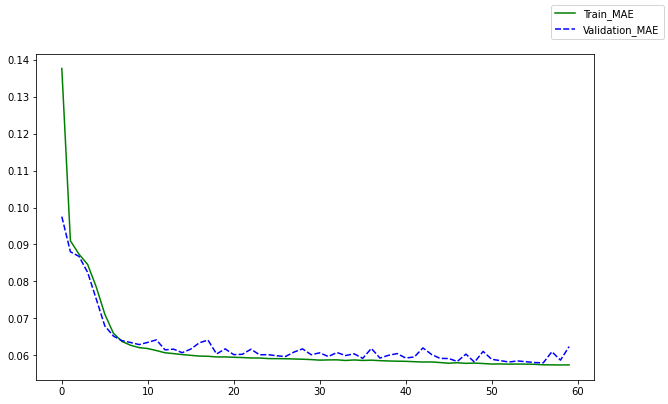

In [113]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=[model_history.history['mean_absolute_error'],model_history.history['val_mean_absolute_error']],palette=['green','blue'],legend=False)
fig.legend(labels=['Train_MAE','Validation_MAE'])

plt.show()

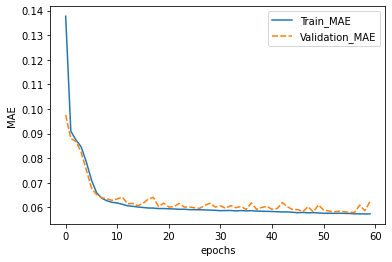

In [114]:

g=sns.lineplot(data=[model_history.history['mean_absolute_error'],model_history.history['val_mean_absolute_error']],legend = False)
g.set(xlabel='epochs',ylabel='MAE')
plt.legend( loc='upper right', labels=['Train_MAE', 'Validation_MAE'])
plt.show(g)


In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [127]:
regr = RandomForestRegressor( random_state=0)
regr.fit(X_train, y_train)



RandomForestRegressor(random_state=0)

In [128]:
y_pred=regr.predict(X_test)

In [129]:
r2_score(y_test,y_pred)

0.5702821424304685

In [133]:
# for i in range(10):
#   print(y_test.values[i],y_pred[i])